## Implementation of Linear Regression from scratch

In [1]:
from IPython.display import Markdown, display

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

from numpy.random import RandomState


In [2]:
printmd = lambda string: display(Markdown(string))

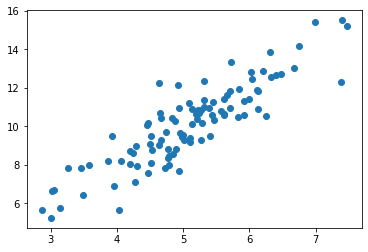

In [3]:
p_random = RandomState(10)

rows = 100
x = p_random.randn(rows, 1) + 5
y = 2*x - p_random.randn(rows, 1)

plt.scatter(x, y);

In [4]:
def plot_data(x, y, theta):
    plt.figure()
    
#     Plot real data
    plt.scatter(x, y);
    
    # Plot line of best fit
    num = 50
    x_test = np.linspace(min(x), max(x), num)
    x_test = np.append(np.ones((num, 1)), x_test, axis=1)
    y_pred = x_test @ theta
    
    
    plt.plot(x_test[:, 1], y_pred, color='orange')
    

#### Line of best fit
```
First lets find a solution by trail and error, by changing the values of theta manually. We expect optimal solution to be roughly close to this solution.
```

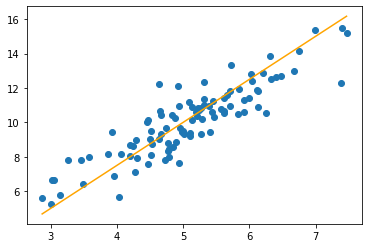

In [5]:
theta = np.array([[-2.5], [2.5]])
plot_data(x, y, theta)

## Linear Regression - For-Loop
Using for loops to implement linear regression.

In [6]:
def linear_regression(x, y, alpha, steps):
    
    theta0, theta1 = 0, 0
    m = len(x)
    for _ in range(steps):
        
        def cost_function_theta0(theta0, theta1):
            total = 0
            for xi, yi in zip(x, y):
                y_pred = theta0 + (theta1 * xi)
                summation = y_pred - yi
                total += summation
            return total

        def cost_function_theta1(theta0, theta1):
            total = 0
            for xi, yi in zip(x, y):
                y_pred = theta0 + (theta1 * xi)
                summation = (y_pred - yi) * xi
                total += summation
            return total
    
        tmp0 = theta0 - ((alpha/m) * cost_function_theta0(theta0, theta1))
        tmp1 = theta1 - ((alpha/m) * cost_function_theta1(theta0, theta1))
        
        theta0 = tmp0
        theta1 = tmp1

    
    return theta0[0], theta1[0]

In [7]:
alpha=0.01
steps=1500

theta0, theta1 = linear_regression(x=x, y=y, alpha=alpha, steps=steps)

In [8]:
theta0 = theta[0, 0]
theta1 = theta[1, 0]

printmd(
"""
### Solution

For `alpha = {}, steps = {}` we have:

`Intercept = {}`

`Gradient = {}`
"""
    .format(alpha, steps, theta0, theta1)
)


### Solution

For `alpha = 0.01, steps = 1500` we have:

`Intercept = -2.5`

`Gradient = 2.5`


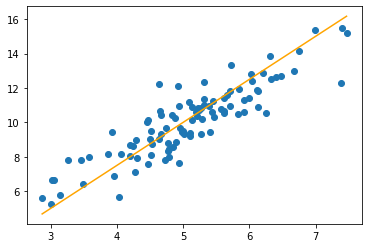

In [9]:
theta = np.array([theta0, theta1])
plot_data(x, y, theta)

## Linear Regression - Vectorised
Using for vectors and matrix operations to implement linear regression.

In [10]:
def _gradient_descent(x, y, theta, alpha_m):
    y_pred = x @ theta # dimensions: [m * (n+1)] @ [(n+1) * 1]
    error = y_pred - y # dimensions: [m * 1] - [m * 1]
    derivative = x.T @ error # dimensions: [(n+1) * m] @ [m * 1]
    theta = theta - (alpha_m * derivative)
    return theta
    
    
def _compute_cost(x, y, theta, m):
    return (1/(2*m)) * (((x @ theta) - y) ** 2).sum()
    
    
def linear_regression_vertorised(x, y, alpha, steps=100):
    """
    Params:
        x (array): (m, n) array where m, n > 0
        y (array): (m, 1) array where m > 0
        alpha (float): Learning rate
        steps (int): No. of steps for gradient descent algorithm
        
    """
    # theta is [(n+1) * 1] column vector, with 0's as initial values
    n_features = x.shape[1]
    theta = np.zeros((n_features + 1, 1))
    
    # add a column of 1's to x (intercept)
    x_ones = np.ones((x.shape[0], 1))
    x = np.append(x_ones, x, axis=1)
    
    m = len(x)
    alpha_m = alpha/m
    
    costs = []
    for i in range(steps):
        theta = _gradient_descent(x, y, theta, alpha_m)
        cost = _compute_cost(x, y, theta, m)
        costs.append(cost)
    
    return theta, costs

In [11]:
alpha=0.01
steps=1500

theta, costs = linear_regression_vertorised(x=x, y=y, alpha=alpha, steps=steps)

In [12]:
theta0 = theta[0, 0]
theta1 = theta[1, 0]

printmd(
"""
### Solution

For `alpha = {}, steps = {}` we have:

`Intercept = {}`

`Gradient = {}`
"""
    .format(alpha, steps, theta0, theta1)
)


### Solution

For `alpha = 0.01, steps = 1500` we have:

`Intercept = 0.32589999939606673`

`Gradient = 1.9226034650810118`


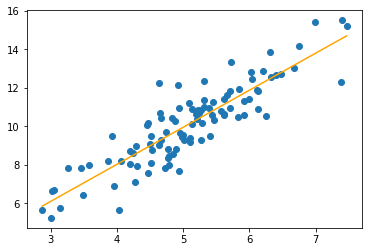

In [13]:
plot_data(x, y, theta)

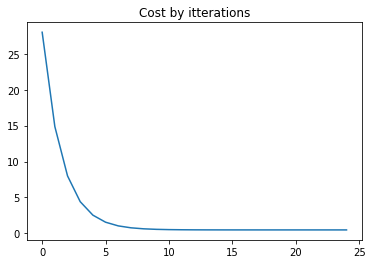

In [14]:
plt.plot(costs[:25])
plt.title('Cost by itterations');

### Linear Regression - SKLearn
Here we will use sklearn module to check our implementations

In [15]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Solution

In [16]:
intercept, coef = model.intercept_[0], model.coef_[0][0]
print('intercept:', intercept)
print('coef:', coef)

intercept: 0.2676049906306428
coef: 1.933692745313711


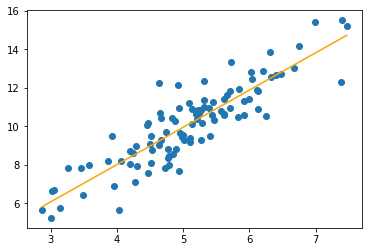

In [17]:
theta = np.array([[intercept], [coef]])
plot_data(x, y, theta)

### Notes:

#### Matrix Multiplication 
**@** and **np.dot** are both for matrix multiplication, `@ runs faster`

